#Introdução

Ao conferir a documentação da biblioteca Pyvis (utilizada no trabalho anterior, de Grafos 1), percebi que ela é um pouco limitada em termos de modelagem de grafos, não permitindo a implementação de alguns algoritmos mais complexos.

Por exemplo, ela não possui a função de deletar arestas, tornando impossível a implementação do Algoritmo de Exclusão Reversa.

Por outro lado, a biblioteca permite uma personalização interessante da visualização dos grafos, e permite integração com a NetworkX, uma biblioteca de grafos mais avançada.

#Instalando dependências necessárias

In [ ]:
!pip install networkx
!pip install pyvis

#Testando a integração entre as bibliotecas NetworkX e Pyvis:

[Código disponibilizado pela documentação do Pyvis, na seção 'Tutorial']

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('nx.html')

#Criando um grafo de exemplo para testar a implementação do algoritmo de Prim

{(0, 1): Text(0.5797666316742909, -0.6236510498339258, '24'),
 (0, 2): Text(-0.11958963510530762, -0.8360002355642309, '4'),
 (1, 3): Text(0.23665129389351675, -0.33763445438485906, '23'),
 (1, 4): Text(0.35318980633012537, 0.08347473342308698, '18'),
 (1, 5): Text(0.6258082285041797, 0.2941656857924646, '9'),
 (2, 3): Text(-0.4627049728860818, -0.5499836401151641, '6'),
 (2, 6): Text(-0.7725576455742413, -0.24238870357599784, '16'),
 (3, 4): Text(0.03127240923851403, -0.006857621293920452, '5'),
 (3, 6): Text(-0.3951187758862541, -0.12037187256270022, '8'),
 (4, 5): Text(0.42042934384917696, 0.6249425188834032, '11'),
 (4, 6): Text(-0.2785802634496455, 0.3007373152452458, '10'),
 (4, 7): Text(-0.11109981751261784, 0.6622064223344672, '14'),
 (5, 7): Text(0.16151860466143647, 0.8728973747038449, '7'),
 (6, 7): Text(-0.537491002637386, 0.5486921710656875, '21')}

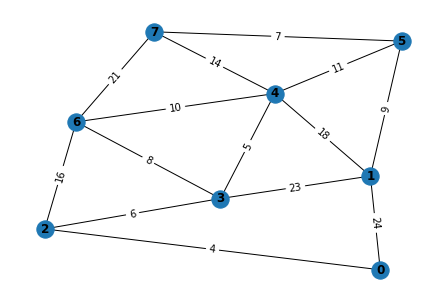

In [ ]:
import networkx as nx

grafo = nx.Graph()

grafo.add_node(0)
grafo.add_node(1)
grafo.add_node(2)
grafo.add_node(3)
grafo.add_node(4)
grafo.add_node(5)
grafo.add_node(6)
grafo.add_node(7)

grafo.add_edge(0, 1, weight=24)
grafo.add_edge(0, 2, weight=4 )
grafo.add_edge(1, 3, weight=23)
grafo.add_edge(1, 4, weight=18)
grafo.add_edge(1, 5, weight=9 )
grafo.add_edge(2, 3, weight=6 )
grafo.add_edge(2, 6, weight=16)
grafo.add_edge(3, 4, weight=5 )
grafo.add_edge(3, 6, weight=8 )
grafo.add_edge(4, 5, weight=11)
grafo.add_edge(4, 6, weight=10)
grafo.add_edge(4, 7, weight=14)
grafo.add_edge(5, 7, weight=7 )
grafo.add_edge(6, 7, weight=21)

# Definir atributo posição (usando um padrão qualquer)
pos = nx.spring_layout(grafo, seed=1)

# Plotar grafo
nx.draw(grafo, pos, with_labels=True, font_weight='bold')

# Obter pesos das arestas e utilizá-los como labels
labels = nx.get_edge_attributes(grafo, 'weight')
nx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels)

O grafo escolhido como exemplo foi baseado no slide 3 dos "Slides de Árvore Geradora Mínima" que encontram-se na disciplina de Projeto de Algoritmos no Aprender3.

#Testando função própria do NetworkX para obter a Árvore Geradora Mínima de um grafo (note que optamos pelo Algoritmo de Prim)

In [ ]:
from networkx.algorithms import tree

mst = tree.minimum_spanning_edges(grafo, algorithm="prim", data=False)
edgelist = list(mst)
sorted(sorted(e) for e in edgelist)

[[0, 2], [1, 5], [2, 3], [3, 4], [3, 6], [4, 5], [5, 7]]

Note que ele retorna um array de arrays correspondentes às arestas que compõem a Árvore Geradora Mínima.

In [ ]:
from pyvis.network import Network

nt = Network('500px', '500px')
nt.from_nx(grafo)
nt.show('nx.html')